In [2]:
import sys
sys.path.append("..")

from utils import pipeline, pipeline_2

# MPI strong scalability

- --nodes=2
- --ntasks-per-node=8
- --cpus-per-task=16 
- MAPBY=numa
- export OMP_PLACES=cores
- export OMP_PROC_BIND=close
- export OMP_NUM_THREADS=16

   mode  size  nthreads    k      time  time_std
0     r     1        16  300  0.197785  0.004141
4     r     2        16  300  0.131764  0.008992
8     r     4        16  300  0.135324  0.000256
12    r     6        16  300  0.136129  0.000461
16    r     8        16  300  0.136044  0.000140
20    r    10        16  300  0.140139  0.002890
24    r    12        16  300  0.144152  0.002860
28    r    14        16  300  0.147621  0.007810
32    r    16        16  300  0.149255  0.004078
   mode  size  nthreads     k       time  time_std
1     r     1        16  3000  15.845208  0.009612
5     r     2        16  3000   9.847007  0.003988
9     r     4        16  3000   9.824893  0.015664
13    r     6        16  3000  10.970676  0.678270
17    r     8        16  3000  13.457256  0.007210
21    r    10        16  3000  13.445687  0.011308
25    r    12        16  3000  13.426559  0.014849
29    r    14        16  3000  13.435241  0.016210
33    r    16        16  3000  13.438024  0.010998


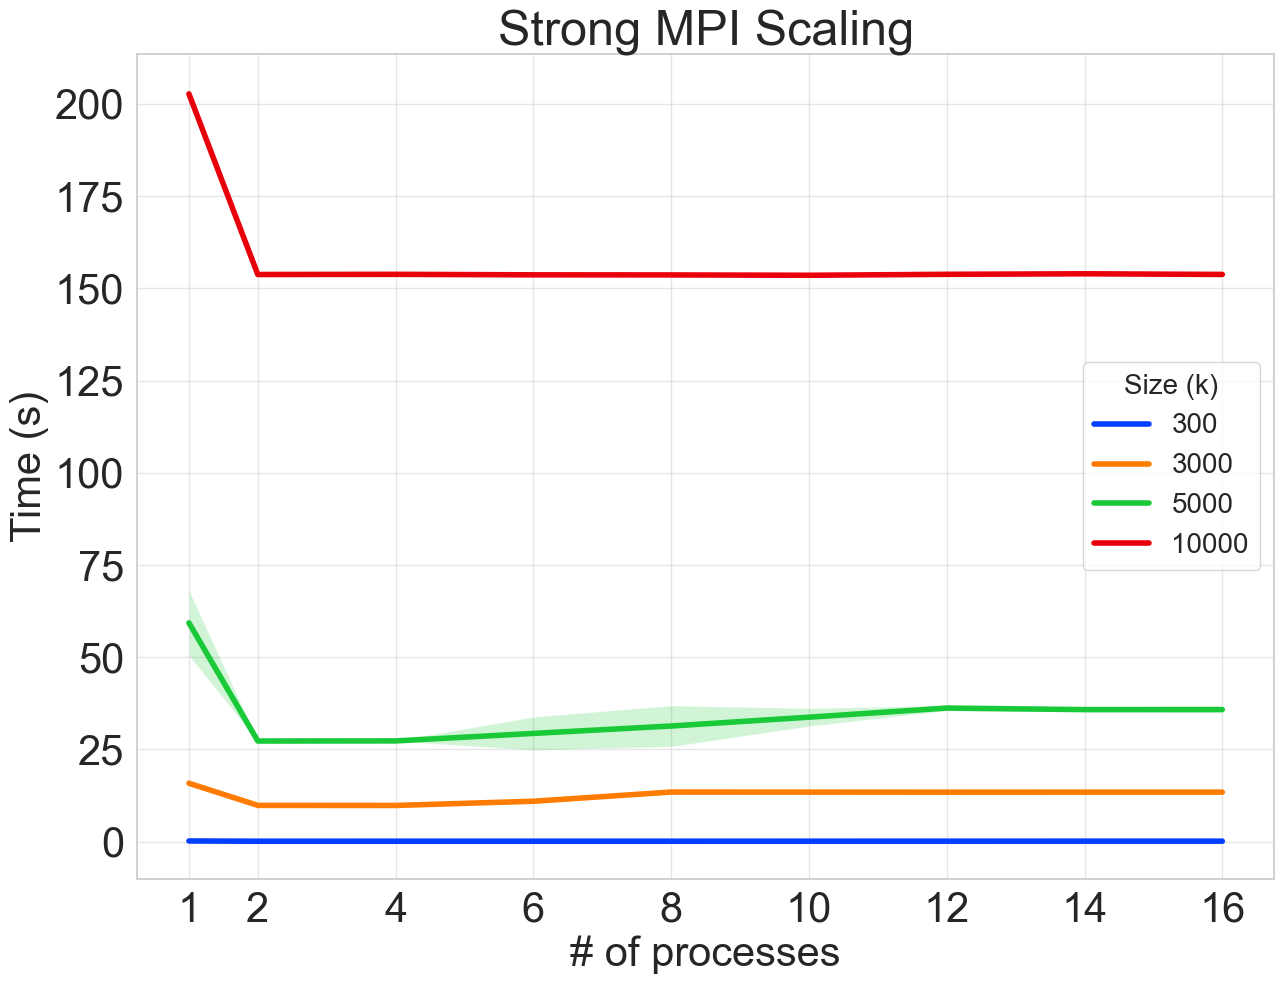

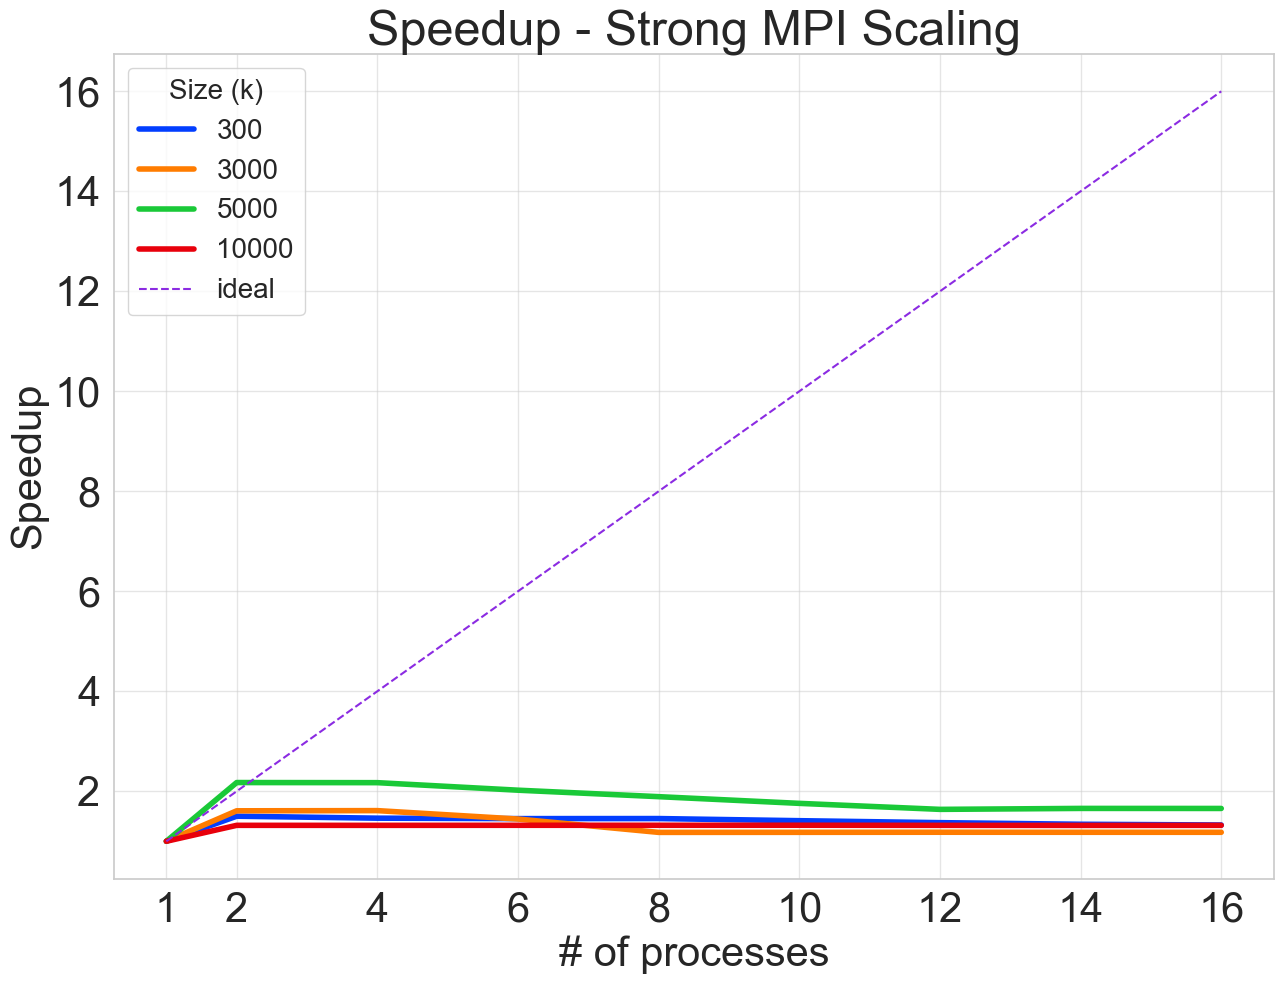

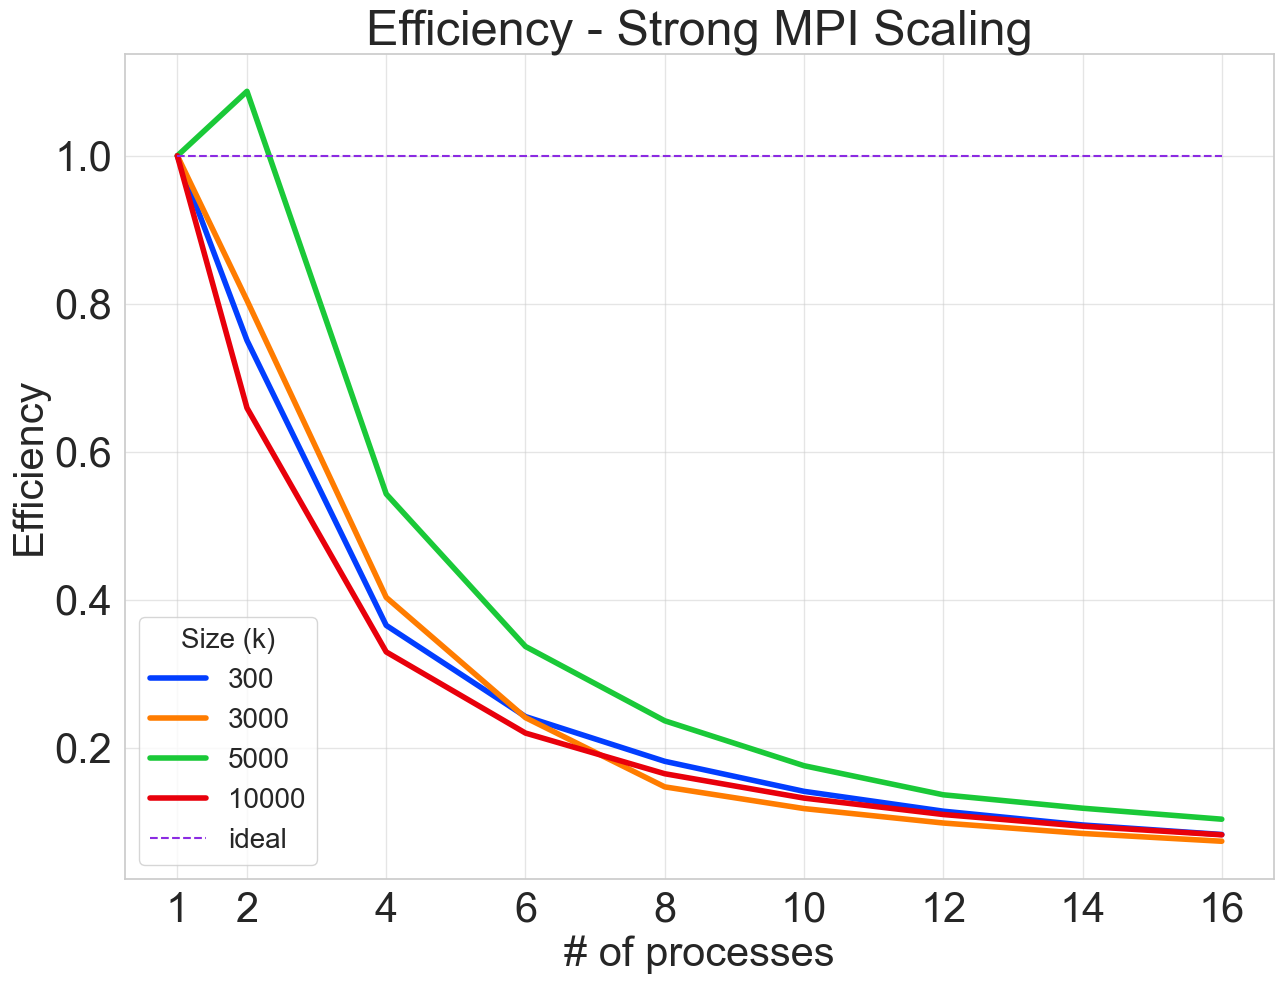

In [3]:
pipeline('MPI_Strong_Ordered.csv',
         mode='r',
         xaxis='size',
         yaxis='time',
         categories=['k'],
         speedup=True,
         efficiency=True,
         #ymin=100, ymax=250,
         xticks=[1,2,4,6,8,10,12,14,16],
         xtickssp=[1,2,4,6,8,10,12,14,16],
         xtickseff=[1,2,4,6,8,10,12,14,16],
         startidxeff=0,
         title='Strong MPI Scaling',
         save = True,
         save_path='./MPI_Strong_Ordered',
         startidx=0
)

# MPI weak scalability

- --nodes=1
- --ntasks-per-node=8
- --cpus-per-task=16 
- MAPBY=numa
- export OMP_PLACES=cores
- export OMP_PROC_BIND=close
- export OMP_NUM_THREADS=16

  mode  size  nthreads     k        time   time_std
0    r     1        16  3000   15.607254   0.007789
1    r     2        16  4242   19.532786   0.002930
2    r     3        16  5196   29.326641   0.003263
3    r     4        16  6000   46.283210   8.311813
4    r     5        16  6708   58.054080  10.462409
5    r     6        16  7348   80.286372   0.418206
6    r     7        16  7937   94.000208   0.144328
7    r     8        16  8485  107.594978   0.116800


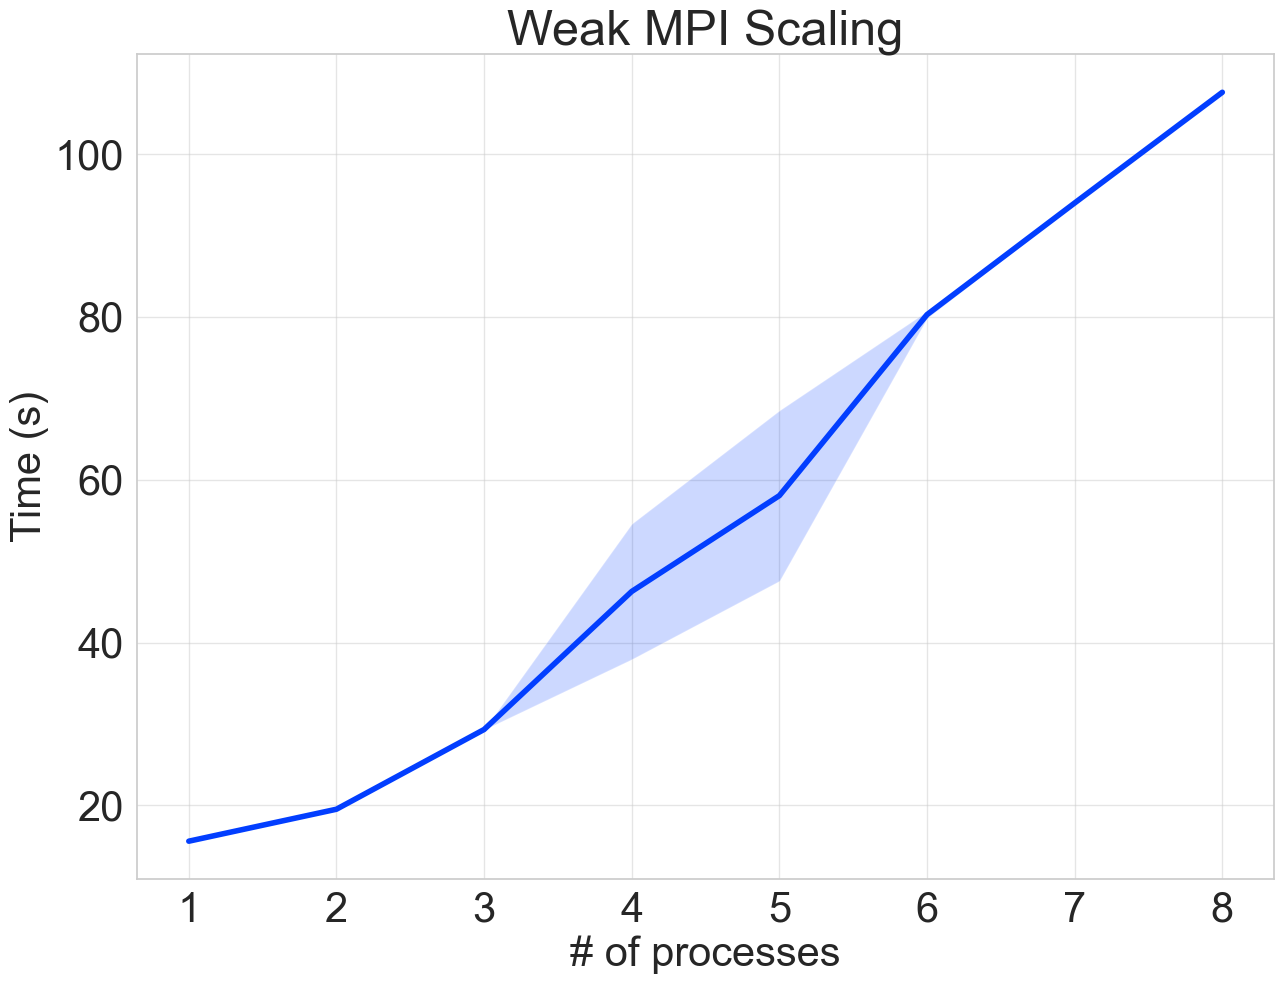

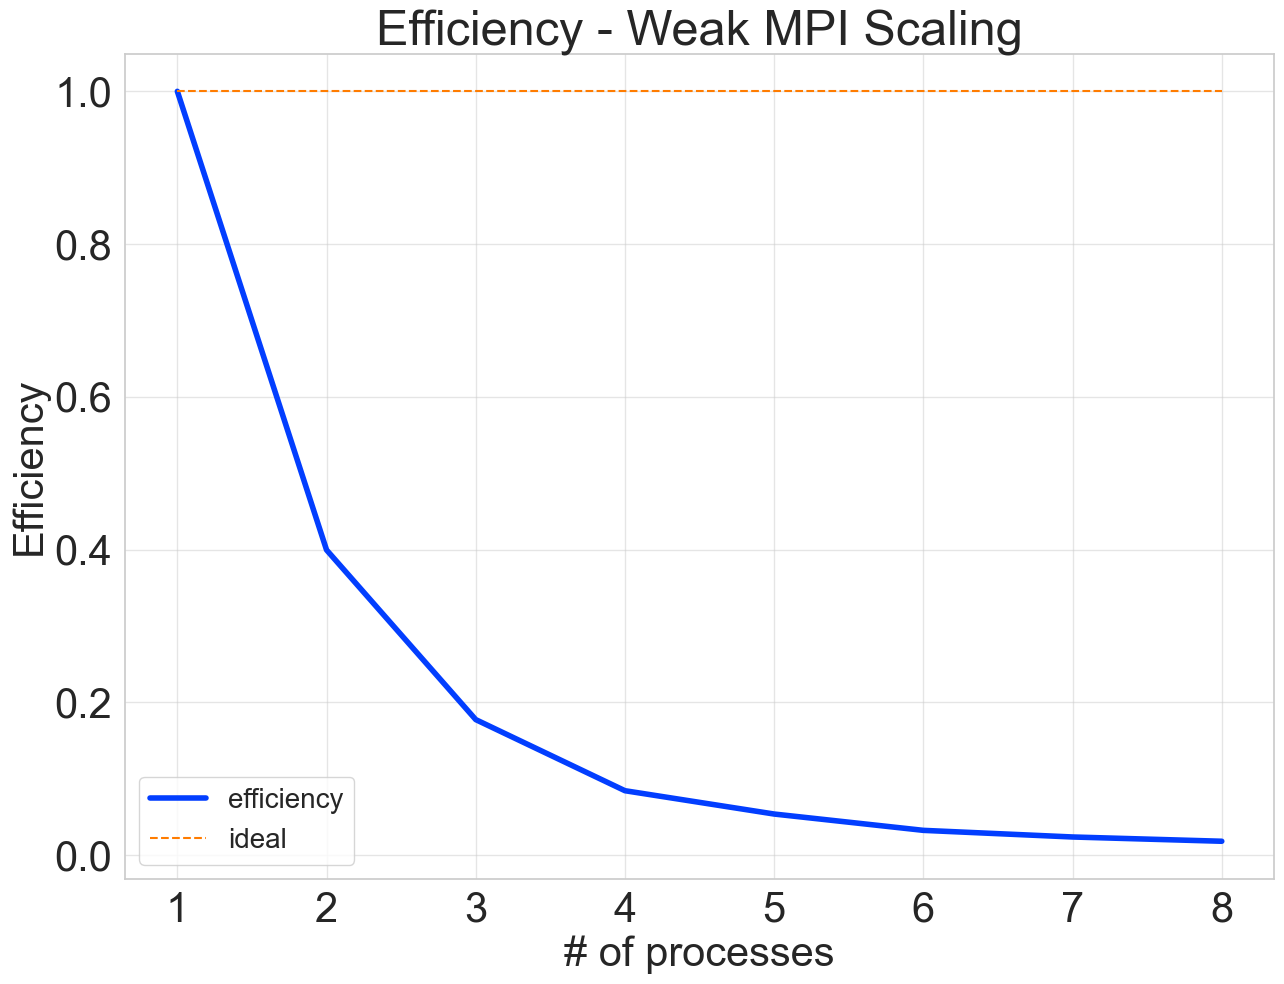

In [4]:
pipeline('MPI_Weak_Ordered.csv',
         mode='r',
         xaxis='size',
         yaxis='time',
         categories=None,
         speedup=False,
         efficiency=True,
         xticks=True,
         xtickssp=True,
         xtickseff=[1,2,3,4,5,6,7,8],
         startidxeff=0,
         title='Weak MPI Scaling',
         save = True,
         save_path='./MPI_Weak_Ordered',
)

# OpenMP Scalability

- --nodes=2
- --ntasks-per-node=2
- --cpus-per-task=64
- MAPBY=node
- BINDTO=socket
- export OMP_PLACES=cores
- export OMP_PROC_BIND=close

   mode  size  nthreads      k        time  time_std
0     r     4         1  10000  149.603304  0.053135
1     r     4         4  10000  149.539244  0.223942
2     r     4         8  10000  149.654288  0.140101
3     r     4        12  10000  149.710840  0.075325
4     r     4        16  10000  149.549810  0.044552
5     r     4        20  10000  149.426181  0.404103
6     r     4        24  10000  149.451380  0.175089
7     r     4        28  10000  149.599884  0.023815
8     r     4        32  10000  149.510610  0.148991
9     r     4        36  10000  149.598937  0.029704
10    r     4        40  10000  149.628423  0.037341
11    r     4        44  10000  149.521037  0.045477
12    r     4        48  10000  149.468641  0.213106
13    r     4        52  10000  149.421758  0.245822
14    r     4        56  10000  149.612942  0.104553
15    r     4        60  10000  149.596907  0.074326


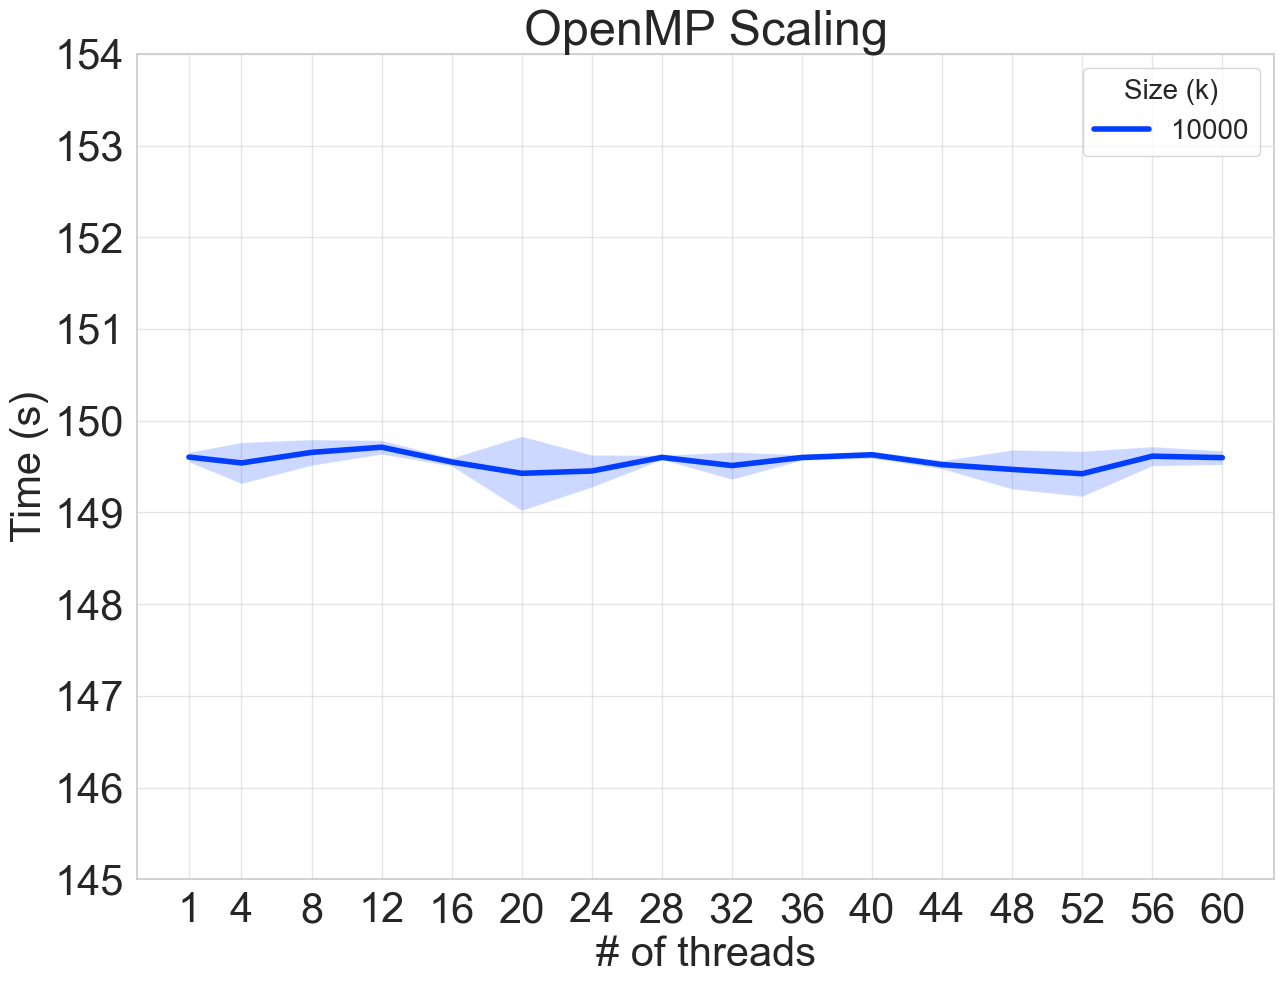

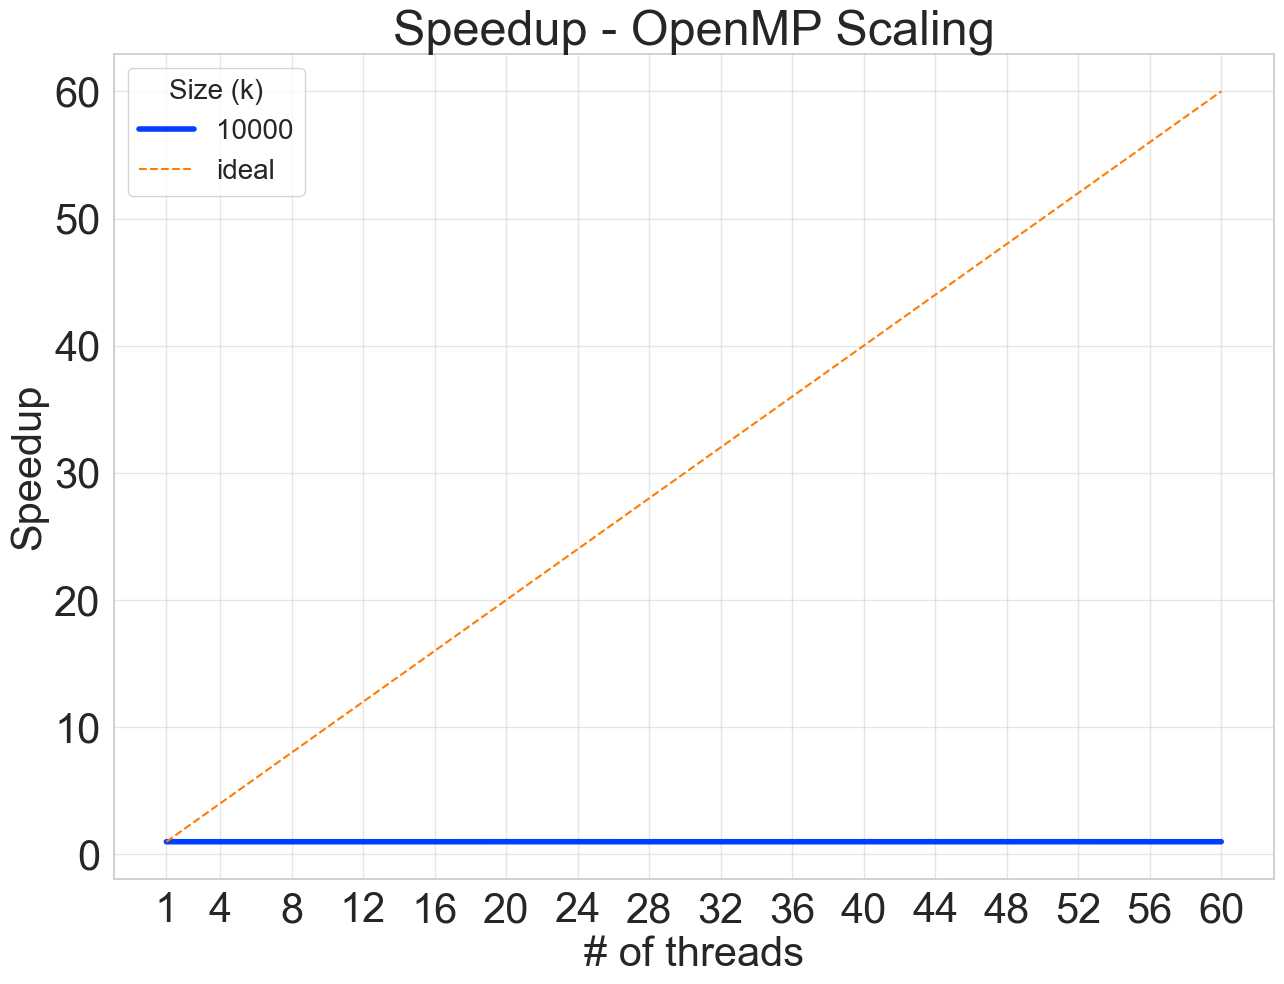

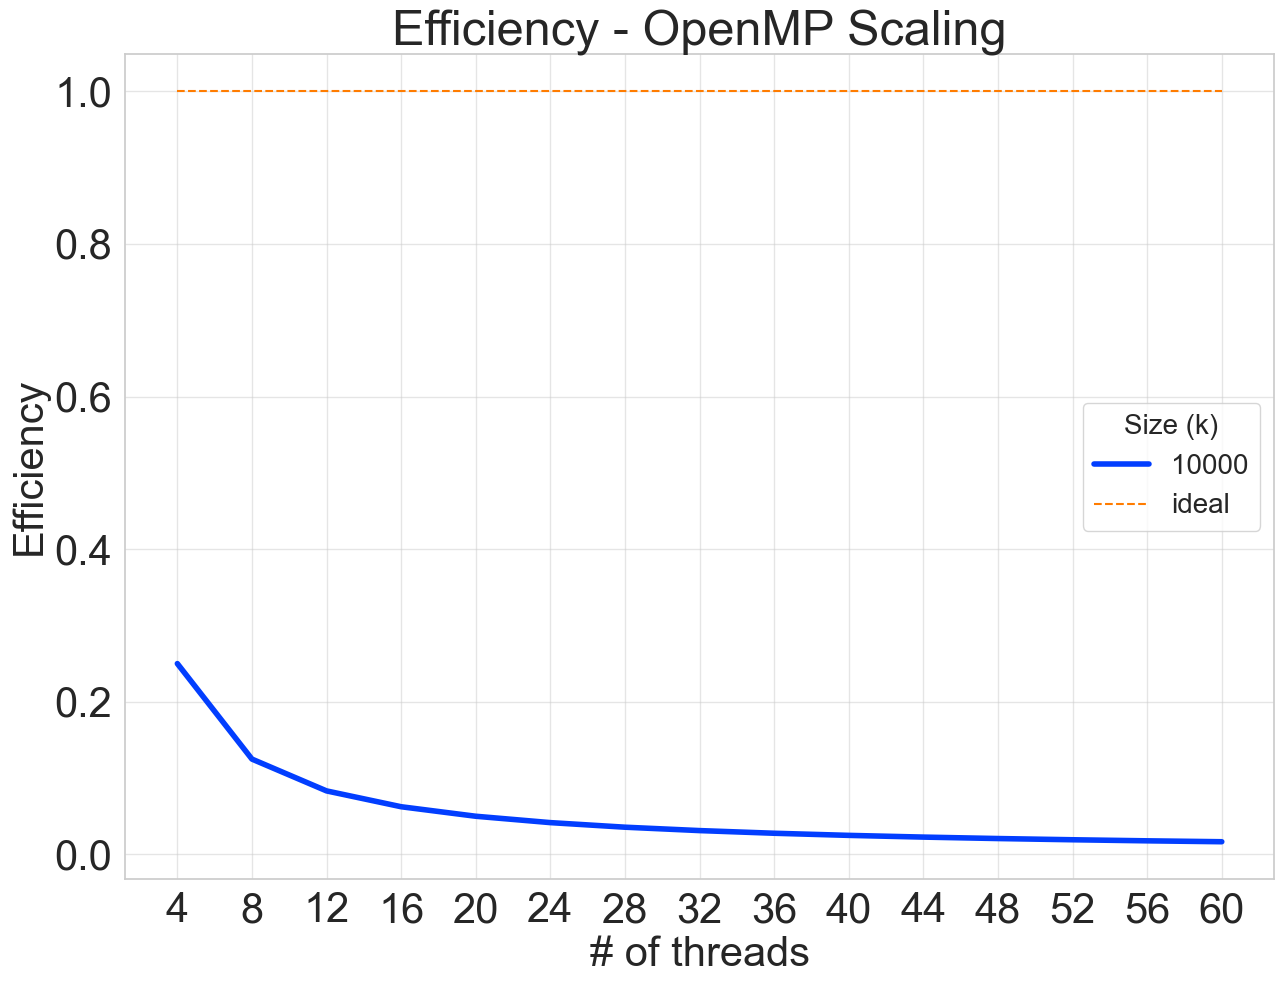

In [5]:
pipeline('OpenMP_Ordered.csv',
         mode='r',
         xaxis='nthreads',
         yaxis='time',
         categories=['k'],
         speedup=True,
         efficiency=True,
         ymin=145, ymax=154,
         xticks=True,
         xtickssp=True,
         xtickseff=True,
         title='OpenMP Scaling',
         save = True,
         save_path='./OpenMP_Ordered',
)